In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
main_dir = './archive/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir, 'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [4]:
train_mask_names = os.listdir(train_mask_dir)
train_nomask_names = os.listdir(train_nomask_dir)
print(train_mask_names[:10])
print(train_nomask_names[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


['./archive/New Masks Dataset\\Train\\Mask\\0003.jpg', './archive/New Masks Dataset\\Train\\Mask\\0006.jpg', './archive/New Masks Dataset\\Train\\Mask\\0018.jpg', './archive/New Masks Dataset\\Train\\Mask\\0019.jpg', './archive/New Masks Dataset\\Train\\Mask\\0022.jpg', './archive/New Masks Dataset\\Train\\Mask\\0027.jpg', './archive/New Masks Dataset\\Train\\Mask\\0029.jpg', './archive/New Masks Dataset\\Train\\Mask\\0037.jpg']
['./archive/New Masks Dataset\\Train\\Non Mask\\0.jpg', './archive/New Masks Dataset\\Train\\Non Mask\\1.jpg', './archive/New Masks Dataset\\Train\\Non Mask\\10.jpg', './archive/New Masks Dataset\\Train\\Non Mask\\100.jpg', './archive/New Masks Dataset\\Train\\Non Mask\\101.jpg', './archive/New Masks Dataset\\Train\\Non Mask\\102.jpg', './archive/New Masks Dataset\\Train\\Non Mask\\104.jpg', './archive/New Masks Dataset\\Train\\Non Mask\\105.jpg']
Mask\0003.jpg
Mask\0006.jpg
Mask\0018.jpg
Mask\0019.jpg
Mask\0022.jpg
Mask\0027.jpg
Mask\0029.jpg
Mask\0037.jpg
Non

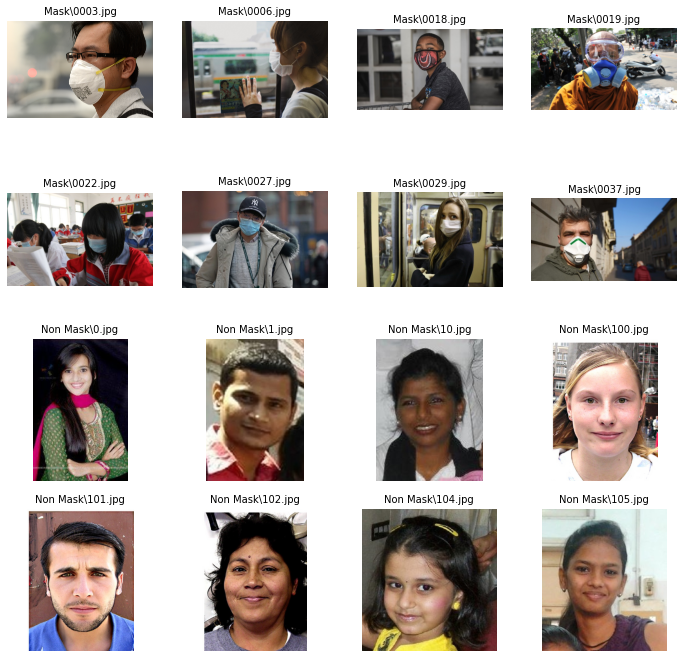

In [5]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
    mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
    nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
    data = merged_list[i].split('\\',2)[2]
    print(data)
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    image = mpimg.imread(merged_list[i])
    sp.set_title(data,fontsize=10)
    plt.imshow(image,cmap='gray')

plt.show()

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range = 0.2,rotation_range = 40,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),batch_size = 32,class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,target_size = (150,150),batch_size = 32,class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(valid_dir,target_size = (150,150),batch_size = 32,class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [7]:
validation_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [8]:
train_generator.image_shape

(150, 150, 3)

In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3), padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(64,(3,3), padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [10]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs= 30, validation_data = validation_generator)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss : '+str(test_loss)+'\n'+'Test accuracy : '+str(test_acc))

In [ ]:
test_image_downloaded = './Test images'
os.listdir(test_image_downloaded)

In [ ]:
from keras.preprocessing import image

In [ ]:
for fname in os.listdir(test_image_downloaded):
    img_path = './Test images/'+fname
    img = image.load_img(img_path,target_size=(150,150))
    images = image.img_to_array(img)
    images = np.expand_dims(images,axis=0)
    prediction = model.predict(images)
    print(fname + ' image is predicted as ' , end='')
    if prediction == 0:
        print('Masked Image')
    else:
        print('Not Masked Image')

In [ ]:
model.save('./detect/model.h5')